In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, f1_score, precision_score, recall_score, precision_recall_curve

In [3]:
data_raw = pd.read_csv('Dataset/Capstone2021_WW2122_20211011.csv')

In [4]:
data = data_raw.copy()

In [5]:
data.iloc[:,:46].columns

Index(['SKU-ID', 'MAC_ADDRESS', 'WorkOrder', 'Rework_Indicator',
       'Indicator_1A2A', 'FT_TESTER', 'APIVersion', 'SvndisuioVersion',
       'FSeqVersion', 'WifiDriverVersion', 'uCodeVersion', 'OBT_SERIAL_NUMBER',
       'REV_TP_FROM_SI', 'SMONTAG', 'CLASSTAG', 'ULTTAG', 'RADIO_STEP',
       'RADIO_DASH', 'SETUP_ID', 'SUBSYSTEM_ID', 'WIFI_NVM_VERSION',
       'COMMON_NVM_VERSION', 'BT_VERSION', 'TestResult', 'FailedChannel',
       'FailedLowLimit', 'FailedHighLimit', 'FailedBand', 'FailedChain',
       'FailedInputPower', 'FailedLimit', 'ActualFailed', 'ErrorMsg',
       'ErrorCode', 'ErrorDetail', 'FailedTest', 'TestTime', 'TA', 'TesterID',
       'StationID', 'SFCEnabled', 'SCAN', 'TotalTestTime', 'Iteration',
       'ProductName', 'TestPlanVersion'],
      dtype='object')

In [6]:
limits = data.loc[:,['FailedTest','ErrorCode','FailedChannel',
       'FailedLowLimit', 'FailedHighLimit', 'FailedBand', 'FailedChain']]

In [7]:
limits.columns[~limits.isnull().all()]

Index(['FailedTest', 'ErrorCode', 'FailedChannel', 'FailedLowLimit',
       'FailedHighLimit', 'FailedBand', 'FailedChain'],
      dtype='object')

In [8]:
limits[~limits.isnull().any(axis=1)].drop_duplicates()

,FailedTest,ErrorCode,FailedChannel,FailedLowLimit,FailedHighLimit,FailedBand,FailedChain
705401,WIFI_TX_TEST,WIFI_FT_ERR-034,161.0,-1.00,1.0,11a,TX_CHAIN_B
708163,WIFI_TX_TEST,WIFI_FT_ERR-034,50.0,-0.85,1.0,11a,TX_CHAIN_A
728261,WIFI_TX_TEST,WIFI_FT_ERR-034,151.0,-0.85,1.0,11a,TX_CHAIN_B
734879,WIFI_TX_TEST,WIFI_FT_ERR-034,6.0,-0.85,1.0,11g,TX_CHAIN_B


In [9]:
data1 = data.iloc[:,46:]
data1['ErrorCode'] = data['ErrorCode']
data1['FailedTest'] = data['FailedTest']
data1['ErrorMsg'] = data['ErrorMsg']
data1['FailedHighLimit'] = data['FailedHighLimit']
data1['FailedLowLimit'] = data['FailedLowLimit']

In [10]:
data1.loc[((data1['FailedHighLimit']==1)&(data1['FailedLowLimit']==-1) )| 
         ((data1['FailedHighLimit']==1)&(data1['FailedLowLimit']==-0.85)),['ErrorMsg','FailedTest','ErrorCode']].values

array([['Tx Power not within limits. Band: 11a; Channel: 161 ; Chain: TX_CHAIN_B; Target Power: 20.000 dBm; Actual: 22.291 dBm; High: 21.000; Low: 19.000',
        'WIFI_TX_TEST', 'WIFI_FT_ERR-034'],
       ['Tx Power not within limits. Band: 11a; Channel: 50 ; Chain: TX_CHAIN_A; Target Power: 10.625 dBm; Actual: 11.651 dBm; High: 11.625; Low: 9.775',
        'WIFI_TX_TEST', 'WIFI_FT_ERR-034'],
       ['Tx Power not within limits. Band: 11a; Channel: 161 ; Chain: TX_CHAIN_B; Target Power: 20.000 dBm; Actual: 22.248 dBm; High: 21.000; Low: 19.000',
        'WIFI_TX_TEST', 'WIFI_FT_ERR-034'],
       ['Tx Power not within limits. Band: 11a; Channel: 161 ; Chain: TX_CHAIN_B; Target Power: 20.000 dBm; Actual: 21.218 dBm; High: 21.000; Low: 19.000',
        'WIFI_TX_TEST', 'WIFI_FT_ERR-034'],
       ['Tx Power not within limits. Band: 11a; Channel: 161 ; Chain: TX_CHAIN_B; Target Power: 20.000 dBm; Actual: 21.014 dBm; High: 21.000; Low: 19.000',
        'WIFI_TX_TEST', 'WIFI_FT_ERR-034'],
  

In [11]:
data1[data1['FailedTest']=='WIFI_TX_TEST'][~data1['ErrorMsg'].str.contains("EVM|Tx Power")]['ErrorMsg'].drop_duplicates().values
# df[df['A'].str.contains("hello")]

array(['Failed to set pre MPAPD config',
       'Failed to trigger periodic calibrations',
       'Error equipment failed to measure WiFi'], dtype=object)

In [12]:
data1[data1['FailedTest']=='WIFI_TX_TEST'][~data1['ErrorMsg'].str.contains("EVM|Tx Power")].index

Int64Index([700897, 701112, 701124, 704494, 704497, 704500, 704572, 704597,
            704902, 705139, 705430, 705476, 705493, 705957, 705958, 705973,
            705975, 705976, 708141, 708164, 708204, 708332, 708349, 708350,
            710647, 710810, 710835, 712869, 713110, 715698, 719030, 719133,
            719214, 719344, 721271, 721387, 721450, 721482, 721560, 723575,
            725789, 728303, 728407, 733010, 733195, 734769, 734778, 734810,
            734996, 735026, 735032, 735546, 735633, 735713, 737582, 737658,
            737689, 737690, 737696, 737700, 737738, 737742, 744159, 744163,
            745096, 745206, 745846, 747210, 747212, 747213, 747217, 747219,
            747223, 747239, 747326, 748678, 749623, 749628, 749630, 749939],
           dtype='int64')

In [13]:
data2 = data1.drop(data1[data1['FailedTest']=='WIFI_TX_TEST'][~data1['ErrorMsg'].str.contains("EVM|Tx Power")].index)

In [14]:
df = data2#.sample(frac=0.2).copy()

### WIFI_TX_TEST (Predict entire WIFI_TX)

In [15]:
wifi_tx_test = df.filter(regex='(ErrorMsg|ErrorCode|FailedTest|DEVICE|WIFI_CHECK_PCIE_GEN|WIFI_RX_CURRENT|WIFI_TX_CURRENT|WIFI_LOW_POWER_XTAL|WIFI_XTAL_CAL|WIFI_TX_INSERTION_LOSS_CAL|WIFI_TX_FREQ_ACCURACY_TEST|WIFI_RSSI_VER|WIFI_RX_TEST_WITH_FALLBACK|WIFI_TX_TEST)')

In [16]:
wifi_tx_test.shape

(750236, 109)

In [17]:
[i for i in wifi_tx_test.columns if all(x in i for x in ['161','WIFI_TX_TEST']) 
                       or all(x in i for x in ['50','WIFI_TX_TEST'])
                      or all(x in i for x in ['151','WIFI_TX_TEST'])]

['All_Values(EVM):WIFI_TX_TEST_11a_HE_11_WB_40MHZ_WB_20MHZ_151_TX_CHAIN_B_RX_CHAIN_AB',
 'All_Values(EVM):WIFI_TX_TEST_11a_HE_11_WB_160MHZ_WB_160MHZ_50_TX_CHAIN_A_RX_CHAIN_AB',
 'All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_HE_11_WB_40MHZ_WB_20MHZ_151_TX_CHAIN_B_RX_CHAIN_AB',
 'All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_HE_11_WB_160MHZ_WB_160MHZ_50_TX_CHAIN_A_RX_CHAIN_AB',
 'All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_R_6M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_AB']

In [18]:
wifi_tx_test5 = wifi_tx_test.dropna(subset=[i for i in wifi_tx_test.columns if not (all(x in i for x in ['161','WIFI_TX_TEST']) 
                       or all(x in i for x in ['50','WIFI_TX_TEST']))])

In [19]:
wifi_tx_test5['Failed_WIFI_TX_567'] = wifi_tx_test5['FailedTest'].apply(lambda x:0 if x=='WIFI_TX_TEST' else 1)

In [20]:
wifi_tx_test5['Failed_WIFI_TX_567'].value_counts()

1    740828
0       414
Name: Failed_WIFI_TX_567, dtype: int64

In [21]:
wifi_tx_test5 = wifi_tx_test5.drop([i for i in wifi_tx_test.columns if all(x in i for x in ['161','WIFI_TX_TEST']) 
                       or all(x in i for x in ['50','WIFI_TX_TEST'])
                      or all(x in i for x in ['151','WIFI_TX_TEST'])], axis=1)

Drop High Correlated Features

In [22]:
# cor_matrix = wifi_tx_test5.loc[:,[i for i in wifi_tx_test5.columns if 'WIFI_TX_FREQ' in i]].corr().abs()
# upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
# len(to_drop) #WIFI_FREQ_ACC #31

In [23]:
cor_matrix = wifi_tx_test5.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
len(to_drop) #WIFI_FREQ_ACC

18

In [24]:
wifi_tx_test5 = wifi_tx_test5.drop(to_drop, axis=1)

In [51]:
train = wifi_tx_test5.sample(frac=0.8,random_state=200)
train_pass = train[train['Failed_WIFI_TX_567']==1].sample(frac=0.1, random_state=200)
train_fail = train[train['Failed_WIFI_TX_567']==0]
train = pd.concat([train_pass,train_fail]).sample(frac=1, random_state=200)
test = wifi_tx_test5.drop(train.index)

X_train = train.drop(['Failed_WIFI_TX_567','ErrorMsg','FailedTest','ErrorCode'], axis=1)
y_train = train['Failed_WIFI_TX_567']
X_test = test.drop(['Failed_WIFI_TX_567','ErrorMsg','FailedTest','ErrorCode'], axis=1)
y_test = test['Failed_WIFI_TX_567']

In [52]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(59613, 83) (59613,) (681629, 83) (681629,)


In [53]:
y_train.value_counts()

1    59264
0      349
Name: Failed_WIFI_TX_567, dtype: int64

In [77]:
# class_weight = dict({1:0.05, 0:1}) 

model1 = RandomForestClassifier(class_weight="balanced", n_estimators= 1000, max_features = "auto", max_depth = None)
model2 = DecisionTreeClassifier()

In [78]:
clf_RF = model1.fit(X_train, y_train)
clf_DT = model2.fit(X_train, y_train)

In [79]:
from sklearn.metrics import classification_report

pred_y_RF = clf_RF.predict(X_test)
pred_y_DT = clf_DT.predict(X_test)

print("Decision Tree:")
print(classification_report(y_test, pred_y_DT))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,pred_y_DT)))
print('_'*60)
print("Random Forest:")
print(classification_report(y_test, pred_y_RF))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,pred_y_RF)))

Decision Tree:
              precision    recall  f1-score   support

           0       0.01      0.38      0.02        65
           1       1.00      1.00      1.00    681564

    accuracy                           1.00    681629
   macro avg       0.50      0.69      0.51    681629
weighted avg       1.00      1.00      1.00    681629

Confusion Matrix : 
[[    25     40]
 [  2945 678619]]
____________________________________________________________
Random Forest:
              precision    recall  f1-score   support

           0       0.07      0.15      0.10        65
           1       1.00      1.00      1.00    681564

    accuracy                           1.00    681629
   macro avg       0.54      0.58      0.55    681629
weighted avg       1.00      1.00      1.00    681629

Confusion Matrix : 
[[    10     55]
 [   132 681432]]


In [80]:
importance = model2.feature_importances_
important_list=[]
for i,v in enumerate(importance):
    important_list.append(v)
sorted_important_list = sorted((list(enumerate(important_list))), key=lambda x:x[1], reverse=True)
topfeature, topfeature_importance = [], []
for i in sorted_important_list:
    topfeature.append(wifi_tx_test5.columns[int(i[0])])
    topfeature_importance.append(float(i[1]*100))
fi = {'Important Features': topfeature, 'Importance %': topfeature_importance}
fi_df_DT = pd.DataFrame(fi)

In [81]:
fi_df_DT['Important Features'].head(30).values

array(['All_Values(EVM):WIFI_TX_TEST_11a_HE_7_WB_20MHZ_WB_20MHZ_108_TX_CHAIN_B_RX_CHAIN_AB',
       'All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_149_TX_CHAIN_B_RX_CHAIN_A',
       'All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_A',
       'All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_B_RX_CHAIN_A',
       'All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_B_RX_CHAIN_A',
       'All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_B_RX_CHAIN_A',
       'All_Values(MEAN_EVM_SP1):WIFI_RX_TEST_WITH_FALLBACK_11a_HE_11_WB_160MHZ_WB_160MHZ_50_TX_CHAIN_A_RX_CHAIN_A_-36.000_5.000_-33.000',
       'All_Values(EVM):WIFI_TX_TEST_11a_HE_11_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_B_RX_CHAIN_AB',
       'All_Values(MEAN_EVM_SP1):WIFI_RX_TEST_WITH_FALLBACK_11g_HT_7_WB_40MH

In [82]:
importance = model1.feature_importances_
important_list=[]
for i,v in enumerate(importance):
    important_list.append(v)
sorted_important_list = sorted((list(enumerate(important_list))), key=lambda x:x[1], reverse=True)
topfeature, topfeature_importance = [], []
for i in sorted_important_list:
    topfeature.append(wifi_tx_test5.columns[int(i[0])])
    topfeature_importance.append(float(i[1]*100))
fi = {'Important Features': topfeature, 'Importance %': topfeature_importance}
fi_df_RF = pd.DataFrame(fi)

In [83]:
fi_df_RF['Importance %'].values[:50]

array([6.75178704, 5.71673581, 5.66305857, 4.07993885, 4.04452127,
       3.90936281, 3.37726849, 3.15104087, 3.13105925, 3.06665817,
       2.9729089 , 2.63822285, 2.49895625, 2.40762939, 2.03410973,
       2.02243973, 2.00430824, 1.82369319, 1.82084546, 1.76282693,
       1.76027495, 1.66023417, 1.64255014, 1.53564362, 1.47845636,
       1.47553184, 1.43231323, 1.22069379, 1.1838944 , 1.04970308,
       0.94868274, 0.85382046, 0.83958813, 0.8126416 , 0.80803879,
       0.78991418, 0.74492991, 0.7323562 , 0.73212372, 0.7234548 ,
       0.69392619, 0.68257472, 0.67609979, 0.64923679, 0.64446579,
       0.62648576, 0.6164521 , 0.58186181, 0.57275777, 0.56029827])

In [84]:
topDT = list(fi_df_DT['Important Features'][:50])
topRF = list(fi_df_RF['Important Features'][:50])

In [85]:
clf_RF = model1.fit(X_train.loc[:,topRF], y_train)
clf_DT = model2.fit(X_train.loc[:,topDT], y_train)

from sklearn.metrics import classification_report

pred_y_RF = clf_RF.predict(X_test.loc[:,topRF])
pred_y_DT = clf_DT.predict(X_test.loc[:,topDT])

print("Decision Tree:")
print(classification_report(y_test, pred_y_DT))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,pred_y_DT)))
print('_'*60)
print("Random Forest:")
print(classification_report(y_test, pred_y_RF))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,pred_y_RF)))

Decision Tree:
              precision    recall  f1-score   support

           0       0.01      0.37      0.01        65
           1       1.00      1.00      1.00    681564

    accuracy                           1.00    681629
   macro avg       0.50      0.68      0.51    681629
weighted avg       1.00      1.00      1.00    681629

Confusion Matrix : 
[[    24     41]
 [  3270 678294]]
____________________________________________________________
Random Forest:
              precision    recall  f1-score   support

           0       0.07      0.18      0.10        65
           1       1.00      1.00      1.00    681564

    accuracy                           1.00    681629
   macro avg       0.54      0.59      0.55    681629
weighted avg       1.00      1.00      1.00    681629

Confusion Matrix : 
[[    12     53]
 [   159 681405]]


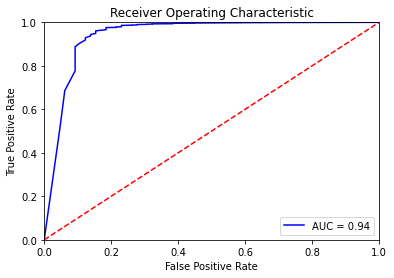

In [86]:
import sklearn.metrics as metrics
probs = clf_RF.predict_proba(X_test.loc[:,topRF])
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
y_testdf = pd.DataFrame(y_test)

In [88]:
y_testdf['preds'] = pred_y_RF

In [89]:
df_out = pd.merge(test,y_testdf,how = 'left',left_index = True, right_index = True)

In [90]:
print("Testing Dataset and Pred Info\n1-PASS 0-FAIL")
df_out1 = df_out.loc[:,['ErrorCode','Failed_WIFI_TX_567_x','preds']].groupby(df_out.loc[:,['ErrorCode','Failed_WIFI_TX_567_x','preds']].columns.tolist(),as_index=False).size()
df_out1[df_out1['ErrorCode'].str.contains("017|034|No")]

Testing Dataset and Pred Info
1-PASS 0-FAIL


,ErrorCode,Failed_WIFI_TX_567_x,preds,size
20,No Error,1,0,157
21,No Error,1,1,678354
23,WIFI_FT_ERR-017,0,0,12
24,WIFI_FT_ERR-017,0,1,47
25,WIFI_FT_ERR-034,0,1,6


In [91]:
print("Training Info")
df_outx = pd.merge(train,pd.DataFrame(y_train),how = 'left',left_index = True, right_index = True)
df_outx = df_outx.loc[:,['ErrorCode']].groupby(df_out.loc[:,['ErrorCode']].columns.tolist(),as_index=False).size()
df_outx[df_outx['ErrorCode'].str.contains("017|034|No")]

Training Info


,ErrorCode,size
13,No Error,58958
14,WIFI_FT_ERR-017,323
15,WIFI_FT_ERR-034,26


In [92]:
threshold = 0.99
predicted_proba = clf_RF.predict_proba(X_test.loc[:,topRF])
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)
accuracy

0.9439211066430565

In [93]:
y_testdf = pd.DataFrame(y_test)

In [94]:
y_testdf['preds_dot99'] = predicted

In [95]:
df_out = pd.merge(test,y_testdf,how = 'left',left_index = True, right_index = True)

In [96]:
print("Testing Dataset and 0.99 Pred Info\n1-PASS 0-FAIL")
df_out1 = df_out.loc[:,['ErrorCode','Failed_WIFI_TX_567_x','preds_dot99']].groupby(df_out.loc[:,['ErrorCode','Failed_WIFI_TX_567_x','preds_dot99']].columns.tolist(),as_index=False).size()
df_out1[df_out1['ErrorCode'].str.contains("017|034|No")]

Testing Dataset and 0.99 Pred Info
1-PASS 0-FAIL


,ErrorCode,Failed_WIFI_TX_567_x,preds_dot99,size
31,No Error,1,0,37141
32,No Error,1,1,641370
34,WIFI_FT_ERR-017,0,0,52
35,WIFI_FT_ERR-017,0,1,7
36,WIFI_FT_ERR-034,0,0,4
37,WIFI_FT_ERR-034,0,1,2


In [97]:
df_out2 = df_out.join(df.loc[:,['All_Values(EVM):WIFI_TX_TEST_11a_HE_11_WB_40MHZ_WB_20MHZ_151_TX_CHAIN_B_RX_CHAIN_AB',
 'All_Values(EVM):WIFI_TX_TEST_11a_HE_11_WB_160MHZ_WB_160MHZ_50_TX_CHAIN_A_RX_CHAIN_AB',
 'All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_HE_11_WB_40MHZ_WB_20MHZ_151_TX_CHAIN_B_RX_CHAIN_AB',
 'All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_HE_11_WB_160MHZ_WB_160MHZ_50_TX_CHAIN_A_RX_CHAIN_AB',
 'All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_R_6M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_AB']])

In [98]:
df_out2 = df_out2[df_out2['ErrorCode'].str.contains("017|034")].loc[:,['All_Values(EVM):WIFI_TX_TEST_11a_HE_11_WB_40MHZ_WB_20MHZ_151_TX_CHAIN_B_RX_CHAIN_AB',
 'All_Values(EVM):WIFI_TX_TEST_11a_HE_11_WB_160MHZ_WB_160MHZ_50_TX_CHAIN_A_RX_CHAIN_AB',
 'All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_HE_11_WB_40MHZ_WB_20MHZ_151_TX_CHAIN_B_RX_CHAIN_AB',
 'All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_HE_11_WB_160MHZ_WB_160MHZ_50_TX_CHAIN_A_RX_CHAIN_AB',
 'All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_R_6M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_AB','ErrorCode','preds_dot99']]

In [100]:
print("Failed case6")
df_out2[df_out2['All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_R_6M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_AB'].isnull()].loc[
    :,['ErrorCode','preds_dot99']].groupby(df_out2.loc[:,['ErrorCode','preds_dot99']].columns.tolist(),as_index=False).size()

Failed case6


,ErrorCode,preds_dot99,size
0,WIFI_FT_ERR-017,0,52
1,WIFI_FT_ERR-017,1,7
2,WIFI_FT_ERR-034,0,2
3,WIFI_FT_ERR-034,1,1


Hyperparameter Tuning

In [51]:
model1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [53]:
random_grid_search = RandomizedSearchCV(estimator = model1, param_distributions = random_grid,
                               cv = 3, n_iter = 30, verbose = 2)

In [54]:
random_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  10.8s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   8.0s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   9.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  31.4s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  24.7s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  27.0s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1400;

[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  39.9s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  59.6s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  56.2s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  57.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  59.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  58.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  54.3s
[CV] END bootstrap=False, max_depth

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=30,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [55]:
random_grid_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [56]:
random_grid_search.best_score_

0.9909609129832949

Testing

In [131]:
data_ww23 = pd.read_csv("Dataset/Capstone_WW23_20211013.csv")

In [132]:
data_ww23_pre = data_ww23.filter(regex='(ErrorMsg|ErrorCode|FailedTest|DEVICE|WIFI_CHECK_PCIE_GEN|WIFI_RX_CURRENT|WIFI_TX_CURRENT|WIFI_LOW_POWER_XTAL|WIFI_XTAL_CAL|WIFI_TX_INSERTION_LOSS_CAL|WIFI_TX_FREQ_ACCURACY_TEST|WIFI_RSSI_VER|WIFI_RX_TEST_WITH_FALLBACK|WIFI_TX_TEST)')

In [134]:
data_ww23_pre = data_ww23_pre.dropna(subset=[i for i in wifi_tx_test.columns if not (all(x in i for x in ['161','WIFI_TX_TEST']) 
                       or all(x in i for x in ['50','WIFI_TX_TEST']))])

In [135]:
data_ww23_pre['Failed_WIFI_TX_567'] = data_ww23_pre['FailedTest'].apply(lambda x:0 if x=='WIFI_TX_TEST' else 1)

In [136]:
data_ww23_pre['Failed_WIFI_TX_567'].value_counts()

1    648365
0        81
Name: Failed_WIFI_TX_567, dtype: int64

In [165]:
data_ww23_pre.loc[:,['FailedTest','ErrorCode']].columns

Index(['FailedTest', 'ErrorCode'], dtype='object')

In [171]:
data_ww23_pre.groupby(list(data_ww23_pre.loc[:,['FailedTest','ErrorCode']].columns),as_index=False).size()

,FailedTest,ErrorCode,size
0,BT_COMMIT,BT_FT_ERR-083,6
1,BT_COMMIT,BT_FT_ERR-264,2
2,BT_COMMIT,FT_ERR-100,1
3,BT_CONNECT_DEVICE,BT_FT_ERR-137,91
4,BT_KFREQ_CALIBRATION,BT_FT_ERR-146,1
5,BT_RF_CALIBRATION,BT_FT_ERR-118,59
6,BT_RX_BER_TEST,BT_FT_ERR-018,14
7,BT_RX_BER_TEST,BT_FT_ERR-039,95
8,BT_TX_TEST,BT_FT_ERR-040,1
9,BT_TX_TEST,BT_FT_ERR-049,48


In [137]:
data_ww23 = data_ww23_pre.drop([i for i in data_ww23.columns if all(x in i for x in ['161','WIFI_TX_TEST']) 
                       or all(x in i for x in ['50','WIFI_TX_TEST'])
                      or all(x in i for x in ['151','WIFI_TX_TEST'])], axis=1)

In [138]:
X_test_ww23 = data_ww23.drop(['Failed_WIFI_TX_567','ErrorMsg','FailedTest','ErrorCode'], axis=1)
y_test_ww23 = data_ww23['Failed_WIFI_TX_567']

In [139]:
threshold = 0.99
predicted_proba = clf_RF.predict_proba(X_test_ww23.loc[:,topRF])
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test_ww23, predicted)
accuracy

0.9358065282228589

In [140]:
y_testdf = pd.DataFrame(y_test_ww23)

In [141]:
y_testdf['preds_dot99'] = predicted

In [142]:
df_out = pd.merge(data_ww23,y_testdf,how = 'left',left_index = True, right_index = True)

In [143]:
print("Testing Dataset and 0.99 Pred Info\n1-PASS 0-FAIL")
df_out1 = df_out.loc[:,['ErrorCode','Failed_WIFI_TX_567_x','preds_dot99']].groupby(df_out.loc[:,['ErrorCode','Failed_WIFI_TX_567_x','preds_dot99']].columns.tolist(),as_index=False).size()
df_out1[df_out1['ErrorCode'].str.contains("017|034|No")]

Testing Dataset and 0.99 Pred Info
1-PASS 0-FAIL


,ErrorCode,Failed_WIFI_TX_567_x,preds_dot99,size
30,No Error,1,0,41065
31,No Error,1,1,605201
33,WIFI_FT_ERR-017,0,0,33
34,WIFI_FT_ERR-017,0,1,27
35,WIFI_FT_ERR-034,0,0,4
36,WIFI_FT_ERR-034,0,1,7


In [144]:
df_out2 = df_out.join(data_ww23_pre.loc[:,['All_Values(EVM):WIFI_TX_TEST_11a_HE_11_WB_40MHZ_WB_20MHZ_151_TX_CHAIN_B_RX_CHAIN_AB',
 'All_Values(EVM):WIFI_TX_TEST_11a_HE_11_WB_160MHZ_WB_160MHZ_50_TX_CHAIN_A_RX_CHAIN_AB',
 'All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_HE_11_WB_40MHZ_WB_20MHZ_151_TX_CHAIN_B_RX_CHAIN_AB',
 'All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_HE_11_WB_160MHZ_WB_160MHZ_50_TX_CHAIN_A_RX_CHAIN_AB',
 'All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_R_6M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_AB']])

In [145]:
df_out2 = df_out2[df_out2['ErrorCode'].str.contains("017|034")].loc[:,['All_Values(EVM):WIFI_TX_TEST_11a_HE_11_WB_40MHZ_WB_20MHZ_151_TX_CHAIN_B_RX_CHAIN_AB',
 'All_Values(EVM):WIFI_TX_TEST_11a_HE_11_WB_160MHZ_WB_160MHZ_50_TX_CHAIN_A_RX_CHAIN_AB',
 'All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_HE_11_WB_40MHZ_WB_20MHZ_151_TX_CHAIN_B_RX_CHAIN_AB',
 'All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_HE_11_WB_160MHZ_WB_160MHZ_50_TX_CHAIN_A_RX_CHAIN_AB',
 'All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_R_6M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_AB','ErrorCode','preds_dot99']]

In [146]:
print("Failed case5")
df_out2[df_out2['All_Values(EVM):WIFI_TX_TEST_11a_HE_11_WB_160MHZ_WB_160MHZ_50_TX_CHAIN_A_RX_CHAIN_AB'].isnull()].loc[
    :,['ErrorCode','preds_dot99']].groupby(df_out2.loc[:,['ErrorCode','preds_dot99']].columns.tolist(),as_index=False).size()

Failed case5


,ErrorCode,preds_dot99,size
0,WIFI_FT_ERR-017,0,16
1,WIFI_FT_ERR-017,1,2


In [148]:
print("Failed case6")
df_out2[df_out2['All_Values(TX_POWER_DIFF):WIFI_TX_TEST_11a_R_6M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_AB'].isnull()].loc[
    :,['ErrorCode','preds_dot99']].groupby(df_out2.loc[:,['ErrorCode','preds_dot99']].columns.tolist(),as_index=False).size()

Failed case6


,ErrorCode,preds_dot99,size
0,WIFI_FT_ERR-017,0,33
1,WIFI_FT_ERR-017,1,27
2,WIFI_FT_ERR-034,0,2
3,WIFI_FT_ERR-034,1,3


In [172]:
X_test_ww23.head()

,DEVICE_IDLE_CURRENT_0.000_0.020,WIFI_CHECK_PCIE_GEN,WIFI_RX_CURRENT_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_7_TX_CHAIN_A_RX_CHAIN_A_0.055_0.085_RX_CURRENT,WIFI_RX_CURRENT_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_7_TX_CHAIN_A_RX_CHAIN_B_0.055_0.085_RX_CURRENT,WIFI_RX_CURRENT_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_48_TX_CHAIN_A_RX_CHAIN_A_0.080_0.110_RX_CURRENT,WIFI_RX_CURRENT_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_A_RX_CHAIN_A_0.080_0.110_RX_CURRENT,WIFI_RX_CURRENT_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_48_TX_CHAIN_A_RX_CHAIN_B_0.080_0.110_RX_CURRENT,WIFI_RX_CURRENT_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_A_RX_CHAIN_B_0.080_0.110_RX_CURRENT,All_Values(TX_CURRENT):WIFI_TX_CURRENT_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_AB_0.260_0.350,All_Values(TX_CURRENT):WIFI_TX_CURRENT_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_40_TX_CHAIN_B_RX_CHAIN_AB_0.270_0.370,All_Values(ACTUAL_POWER):WIFI_TX_CURRENT_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_AB_0.260_0.350,All_Values(ACTUAL_POWER):WIFI_TX_CURRENT_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_40_TX_CHAIN_B_RX_CHAIN_AB_0.270_0.370,WIFI_LOW_POWER_XTAL,WIFI_XTAL_CAL_TEST_1_0_700_CAPACITANCE1_OFFSET,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_B_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_B_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_13_TX_CHAIN_A_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_13_TX_CHAIN_B_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_A_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_52_TX_CHAIN_A_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_B_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_52_TX_CHAIN_B_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_A_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_B_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_A_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_B_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_132_TX_CHAIN_A_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_132_TX_CHAIN_B_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_149_TX_CHAIN_A_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_149_TX_CHAIN_B_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_A_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_A,All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A,All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_B_RX_CHAIN_A,All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A,All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_B_RX_CHAIN_A,All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_13_TX_CHAIN_A_RX_CHAIN_A,All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_13_TX_CHAIN_B_RX_CHAIN_A,All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_A_RX_CHAIN_A,All_

In [ ]:
|